In [1]:
import matplotlib.pyplot as plt
import numpy as np

k_interval = np.linspace(-np.pi, np.pi, 2000)

eps_k = - np.cos(k_interval)

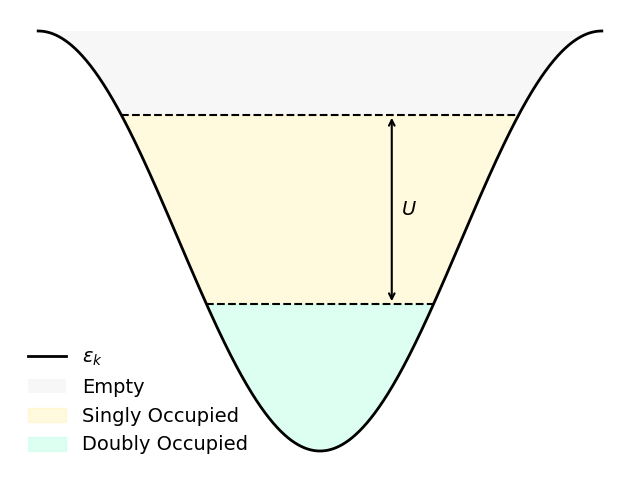

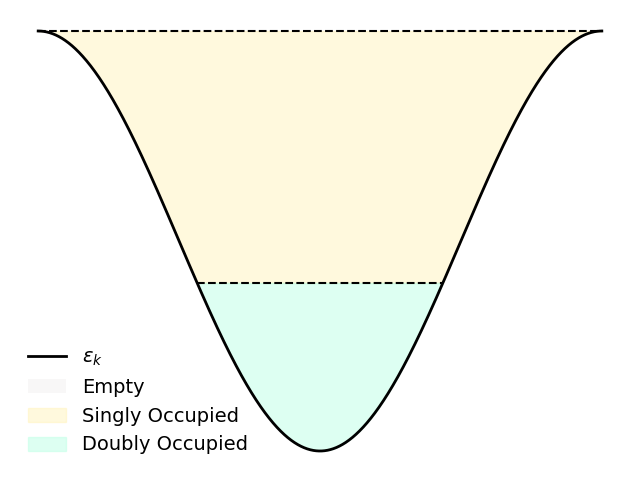

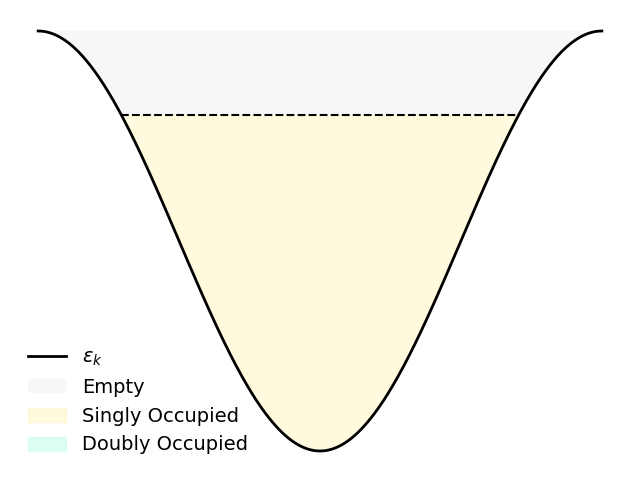

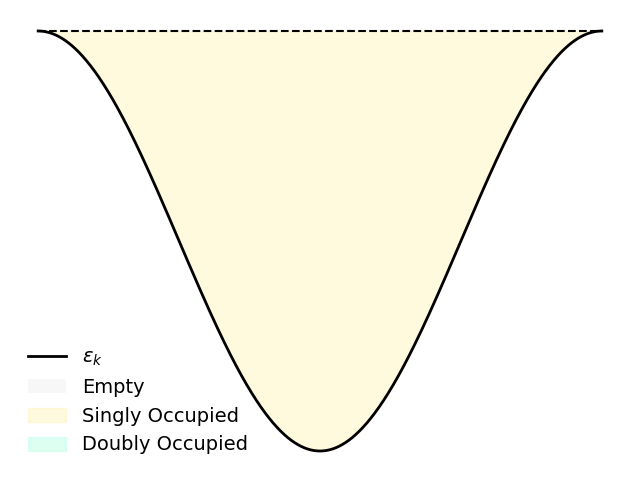

In [9]:
def plot_band(xarray, yarray, phase_lower, phase_higher, arrow=False, arrow_pos=0, hatch='', save_title=''):
    
    fig, ax = plt.subplots(figsize=(8,6))

    # Plot function
    ax.plot(xarray, yarray, color="black", linewidth=2, label=r'$\epsilon_k$')

    ax.fill_between(
        xarray, np.clip(yarray, phase_higher, 1), 1,                      # fill between curve and y=0
        facecolor="#f2f0f0",                       # no solid fill
        alpha=0.5,
        hatch=hatch,                               # dotted hatch pattern
        edgecolor="gray",                       # hatch color
        linewidth=0.0,                          # no outline
        label='Empty'
    )

    #ax.fill_between(k_interval, eps_k, 1, alpha=0.5, color="#e8e8e8")
    ax.fill_between(
        xarray, np.clip(yarray, phase_lower, phase_higher), phase_higher, 
        label='Singly Occupied', 
        alpha=0.4, 
        color="#fff0ab", 
        where=(eps_k<=phase_higher)
    )
    ax.fill_between(
        xarray, np.clip(yarray, -1, phase_lower), phase_lower, 
        label='Doubly Occupied', 
        alpha=0.5, 
        color="#bdffe6", 
        where=(eps_k<=phase_lower)
    )

    # Draw dashed vertical lines
    ax.hlines(phase_higher, -np.arccos(-phase_higher), np.arccos(-phase_higher), colors="black", linestyles="dashed")
    ax.hlines(phase_lower, -np.arccos(-phase_lower), np.arccos(-phase_lower), colors="black", linestyles="dashed")

    if arrow==True:
        ax.annotate(
            '', 
            xy=(arrow_pos, phase_higher), xycoords='data',
            xytext=(arrow_pos, phase_lower), textcoords='data',
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5)
        )

        # Add label next to the arrow
        ax.text(
            arrow_pos + 0.1,                            # a bit to the right of the arrow
            (phase_lower + phase_higher)/2,             # vertically centered
            r"$U$",                                     # LaTeX-style math label
            va="center", ha="left",                     # align middle vertically, left horizontally
            fontsize=14
        )

    # Move y-axis to x=0, and x-axis to y=0
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")

    # Hide the other spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    # Remove ticks and numbers
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    #ax.set_xlabel(r'$k$', loc="right")
    #ax.set_ylabel(r'$\epsilon_k$', loc="top", rotation=0)

    ax.legend(fontsize=14, loc="lower left", frameon=False)

    # Optional: equal aspect ratio for aesthetics
    ax.set_aspect("auto")

    if save_title != '':
        plt.savefig(save_title, bbox_inches="tight")

    plt.show()

plot_band(k_interval, eps_k, -0.3, 0.6, arrow=True, arrow_pos=0.8, hatch='', save_title='phase1.pdf')
plot_band(k_interval, eps_k, -0.2, 1, arrow_pos=0.8, save_title='phase3.pdf')
plot_band(k_interval, eps_k, -1, 0.6, save_title='phase2.pdf')
plot_band(k_interval, eps_k, -1, 1, save_title='phase4.pdf')

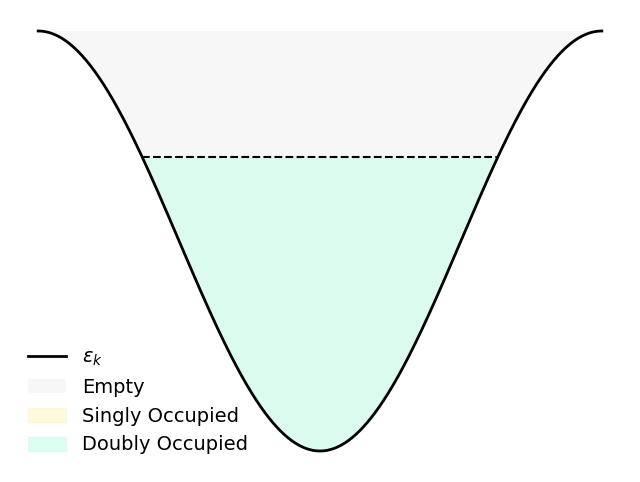

In [10]:
plot_band(k_interval, eps_k, 0.4, -1, save_title='attractive.pdf')